# Análisis de los datos obtenidos 

Compararación de tres filamentos distintos

* Filamento de BQ
* Filamento de formfutura
* Filamento de filastriuder

In [1]:
%pylab inline
#Importamos las librerías utilizadas
import numpy as np
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Mostramos las versiones usadas de cada librerías
print ("Numpy v{}".format(np.__version__))
print ("Pandas v{}".format(pd.__version__))
print ("Seaborn v{}".format(sns.__version__))

Numpy v1.9.2
Pandas v0.16.2
Seaborn v0.6.0


In [11]:
#Abrimos los ficheros con los datos
conclusiones = pd.read_csv('Conclusiones.csv')

In [26]:
columns=['bq','formfutura','filastruder']

In [27]:
#Mostramos un resumen de los datos obtenidoss
conclusiones[columns].describe()

,bq,formfutura,filastruder
count,291.000000,291.000000,291.000000
mean,1.758832,1.701546,1.742131
std,0.017870,0.057691,0.215783
min,1.670000,1.640000,1.010000
25%,1.750000,1.680000,1.600000
50%,1.760000,1.690000,1.800000
75%,1.770000,1.710000,1.910000
max,1.800000,2.480000,2.140000


Representamos ambos diámetro y la velocidad de la tractora en la misma gráfica

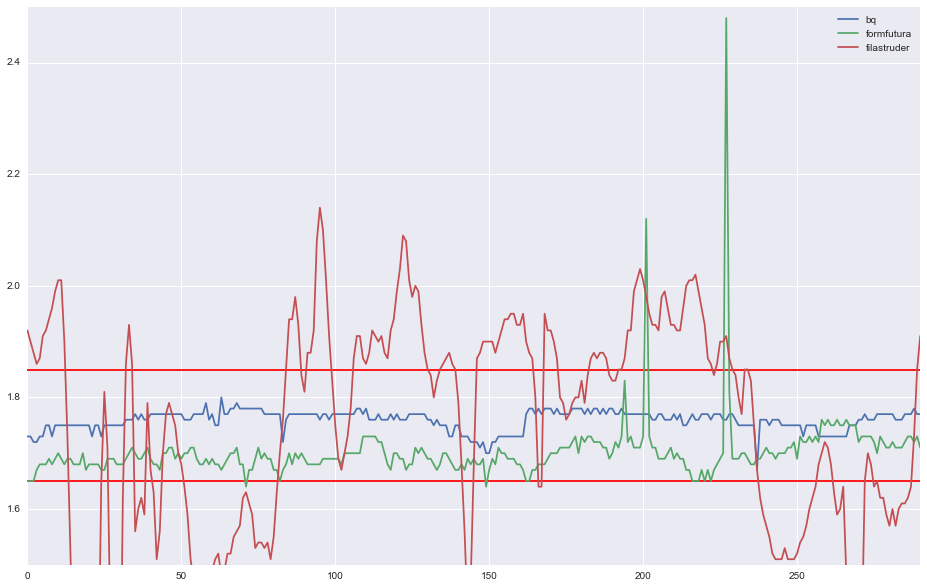

In [28]:
conclusiones[columns].plot(figsize=(16,10),ylim=(1.5,2.5)).hlines([1.85,1.65],0,3500,colors='r')
#datos['RPM TRAC'].plot(secondary_y='RPM TRAC')

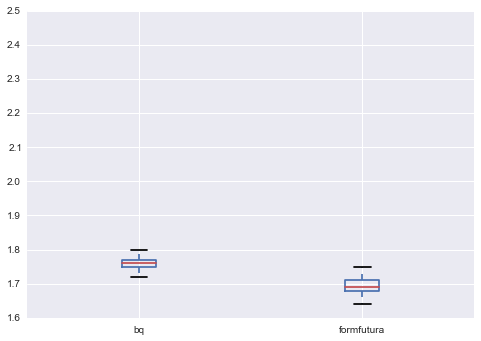

In [24]:
conclusiones[columns].boxplot(return_type='axes')

Aumentando la velocidad se ha conseguido que disminuya el valor máxima, sin embargo ha disminuido el valor mínimo. Para la siguiente iteracción, se va a volver a las velocidades de 1.5- 3.4 y se van a añadir más reglas con unos incrementos de velocidades menores, para evitar saturar la velocidad de traccción tanto a nivel alto como nivel bajo.

Comparativa de Diametro X frente a Diametro Y para ver el ratio del filamento

#Filtrado de datos
Las muestras tomadas $d_x >= 0.9$ or $d_y >= 0.9$ las asumimos como error del sensor, por ello las filtramos de las muestras tomadas.

In [28]:
datos_filtrados = datos[(datos['Diametro X'] >= 0.9) & (datos['Diametro Y'] >= 0.9)]

In [29]:
#datos_filtrados.ix[:, "Diametro X":"Diametro Y"].boxplot(return_type='axes')

##Representación de X/Y

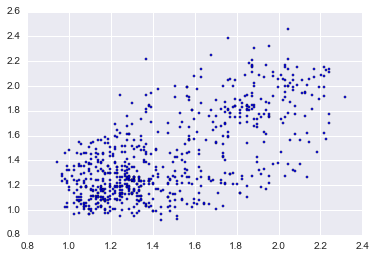

In [30]:
plt.scatter(x=datos_filtrados['Diametro X'], y=datos_filtrados['Diametro Y'], marker='.')

#Analizamos datos del ratio

In [31]:
ratio = datos_filtrados['Diametro X']/datos_filtrados['Diametro Y']
ratio.describe()

count    717.000000
mean       1.052009
std        0.204253
min        0.616384
25%        0.916724
50%        1.030142
75%        1.140996
max        1.689048
dtype: float64

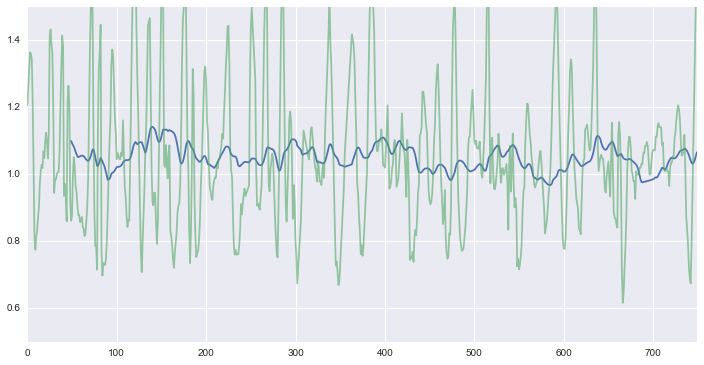

In [32]:
rolling_mean = pd.rolling_mean(ratio, 50)
rolling_std = pd.rolling_std(ratio, 50)
rolling_mean.plot(figsize=(12,6))
# plt.fill_between(ratio, y1=rolling_mean+rolling_std, y2=rolling_mean-rolling_std, alpha=0.5)
ratio.plot(figsize=(12,6), alpha=0.6, ylim=(0.5,1.5))

#Límites de calidad

Calculamos el número de veces que traspasamos unos límites de calidad. 
$Th^+ = 1.85$ and $Th^- = 1.65$ 

In [33]:
Th_u = 1.85
Th_d = 1.65

In [34]:
data_violations = datos[(datos['Diametro X'] > Th_u) | (datos['Diametro X'] < Th_d) |
                       (datos['Diametro Y'] > Th_u) | (datos['Diametro Y'] < Th_d)]

In [35]:
data_violations.describe()

,Tmp Husillo,Tmp Nozzle,Diametro X,Diametro Y,MARCHA,PARO,RPM EXTR,RPM TRAC
count,719.000000,719.000000,719.000000,719.000000,719,719,719,719.000000
mean,66.321280,151.304172,1.421605,1.364943,1,1,0,2.442142
std,0.200433,0.891735,0.363879,0.371820,0,0,0,1.360563
min,65.900000,149.500000,0.014000,0.000342,True,True,0,1.700000
25%,66.100000,150.600000,1.172458,1.138152,1,1,0,1.700000
50%,66.400000,151.200000,1.321566,1.264575,1,1,0,1.700000
75%,66.500000,152.000000,1.631253,1.563394,1,1,0,1.700000
max,66.600000,153.200000,2.319446,2.459850,True,True,0,5.300000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13E92C30>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13FCB950>], dtype=object)

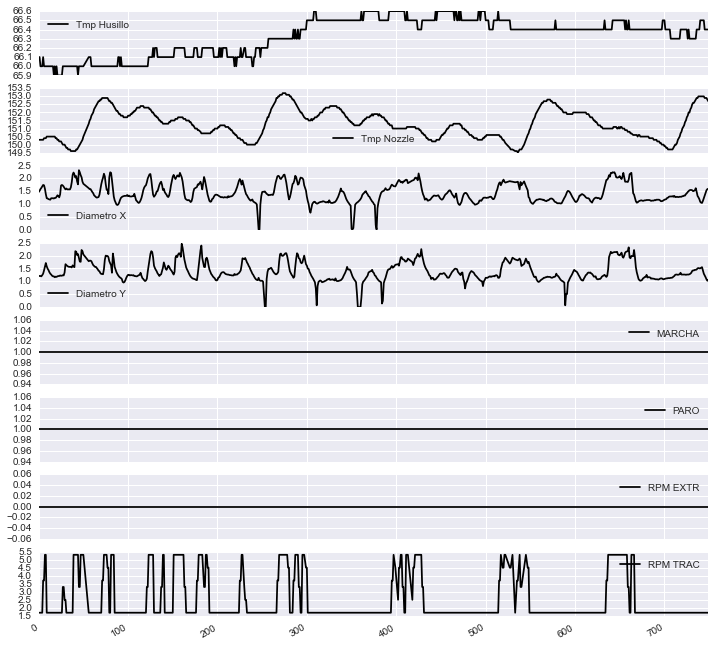

In [36]:
data_violations.plot(subplots=True, figsize=(12,12))